### Testing the floating metal tube 16 mm downstream from the PFS

**Notes:**

Base pressure is 6.0e-7 mBar.

Continuation from yesterday. We want to explore higher pressures and currents.

**Conclusion:**

TBD.

<img src="images/PXL_20201130_113607609.jpg" width="500">

### Communicate with the Keithley DMM Array Plate Monitor and Take Data

1. Connect to the Keithley over local area network ethernet
2. Take current reading (voltage across 100 Ohm resistor)
    * Flick switch to current on array plate interface box
3. Take voltage reading (charge accumulated on floating pin of array plate)
    * Flick switch to voltage on array plate interface box
4. Append readings in the form of a dictionary to a list
5. Repeat until all data is taken
6. Save data to json file
7. Disconnect Keithley to release the socket so other programs can use it


### Use the following cells to take data

In [1]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)

<module 'ArrayPlateLogger' from 'C:\\Users\\matt_\\Documents\\GitHub\\ArrayPlateKeithleyLogger\\ArrayPlateLogger.py'>

In [15]:
apl.disconnectVisa() # If you lose communications with the Keithley, run this.

In [16]:
data = apl.arrayPlateMeasurement()
data.connect()

KEITHLEY INSTRUMENTS INC.,MODEL 2701,4368285,D05  /A02  


### Run the following cell just to get a quick reading

In [3]:
currents = data.readCurrents(centre5x5 = False)
apl.plotI(currents)

### Run following cell to add data to list of dictionaries

In [13]:
# data.data[-1]['pressure'] = 1.6e-3 # correct pressure reading
# data.deleteLast()

In [52]:
currents = data.readCurrents(centre5x5=False)
# apl.plotI(currents)
data.append(
    pressure = 4.0e-4,
    Vbias = 125,
    Ibias = 0.548,
    Varc = 70.1,
    Iarc = 6.08,
    Vpfs_tube = 45.64,
    Ibase = 26.55,
    currents = currents,
    note = 'Tube floating. Now increasing current at max pressure.'
)
data.plotI()

Number of entries: 36


In [53]:
data.save('data')

[
    {
        "pressure": 5.5e-05,
        "Vbias": 125,
        "Ibias": 0.003,
        "Varc": 70.8,
        "Iarc": 1.1,
        "Vpfs_tube": 90.8,
        "Ibase": -0.065,
        "currents": [
            [
                -2.707e-05,
                5.821e-05,
                0.0001578,
                0.0001876,
                0.0001598,
                3.778e-05,
                -2.52e-05
            ],
            [
                -2.489e-05,
                0.0001902,
                0.0003663,
                0.0004194,
                0.0003789,
                0.0002118,
                1.478e-05
            ],
            [
                0.0001236,
                0.0003303,
                0.0001026,
                -0.0003988,
                -0.00245,
                0.0003269,
                0.0001406
            ],
            [
                0.0001403,
                -0.0003913,
                -4.606e-05,
                0.0002103,
                -0.0014

In [54]:
data.disconnect()

### Use the following cells to look at the data

* I didn't get much data because the filament was failing and gave up during the penultimate run.
* The current hitting the baseplate and the fluorescence visible in the chamber was highly dependent on the gas pressure.
* I am not convinced that the bias current is representative of typical running conditions because the filament was failing and will have had a hot spot.
* I varied the bias voltage and extraction voltage but because the extraction voltage was actually set positive, the bias voltage was highly coupled to it and floated up to always be 5 to 10 V more positive than the voltage on the extractor.
* Need at least + 100 V bias/extraction V or ion current is not centralised on the array plate.

In [59]:
savedData = apl.arrayPlateMeasurement()
savedData.load("data_201201_122958.json")

36 entries loaded.


time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase   IpinMax  \
0  201201_113416    125  0.003  70.8   1.1       90.8 -0.065  0.000419   

   pressure            note  
0  0.000055  Tube floating.

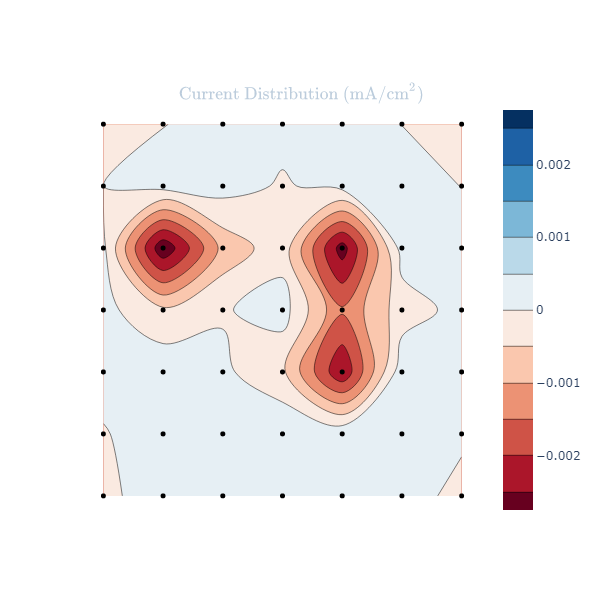

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase   IpinMax  \
1  201201_113528    125    2.6  70.8  1.17       73.4 -0.176  0.000179   

   pressure            note  
1   0.00009  Tube floating.

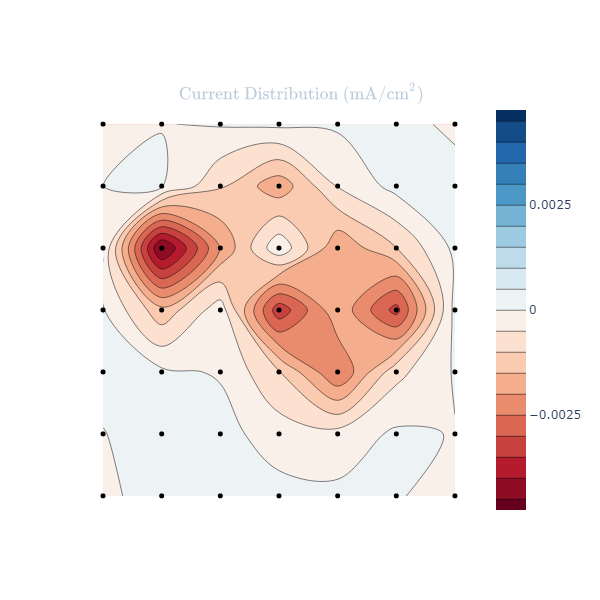

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase   IpinMax  \
2  201201_113636    125    8.6  70.8  1.22       67.0  0.064  0.003483   

   pressure            note  
2   0.00011  Tube floating.

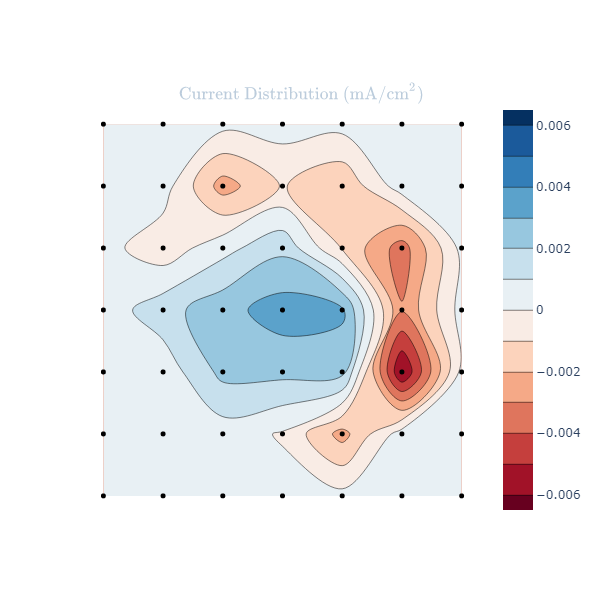

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
3  201201_113727    125   23.7  70.8  1.24       58.7  1.013  0.01468   

   pressure            note  
3   0.00013  Tube floating.

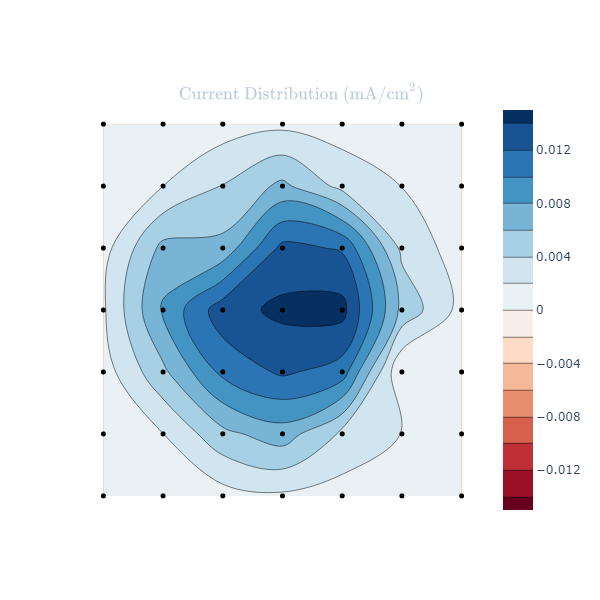

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
4  201201_113821    125   65.6  70.8  1.22      52.57   4.34  0.04655   

   pressure            note  
4   0.00017  Tube floating.

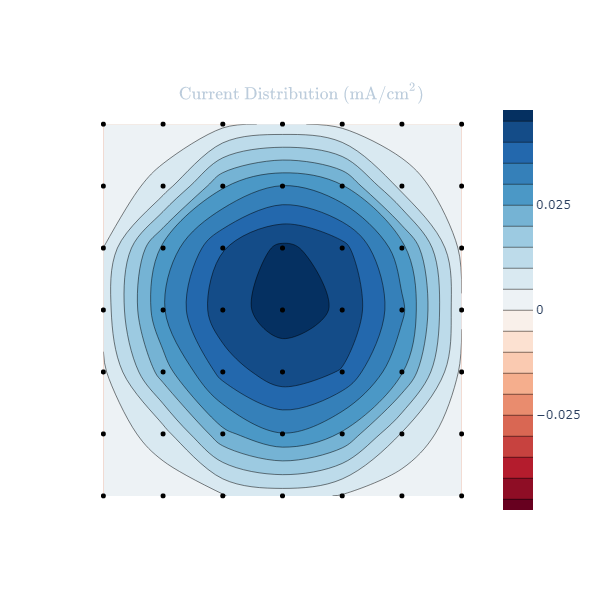

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
5  201201_113931    125   81.6  70.8  1.28      42.68    6.1  0.06478   

   pressure            note  
5    0.0003  Tube floating.

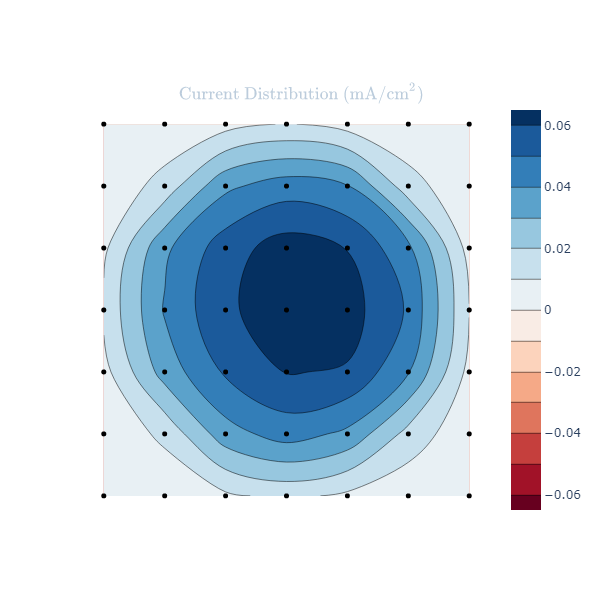

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
6  201201_114034    125  114.7  70.8  1.36      35.96    9.1  0.09538   

   pressure            note  
6    0.0006  Tube floating.

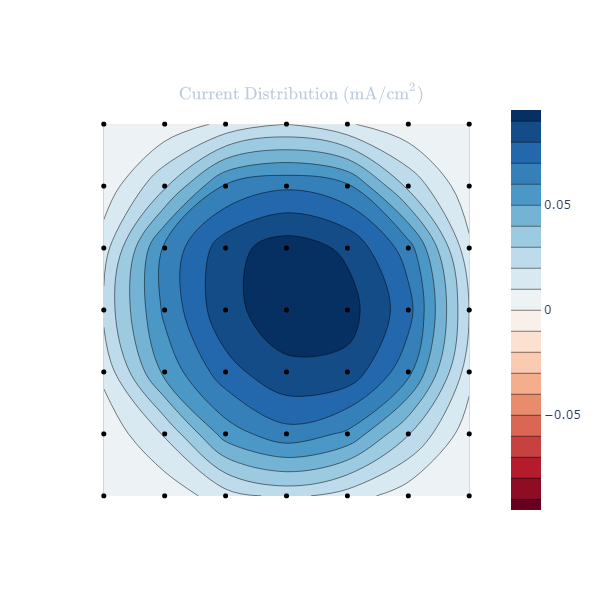

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
7  201201_114128    125  131.7  70.8  1.44      33.13  11.05   0.1153   

   pressure            note  
7    0.0009  Tube floating.

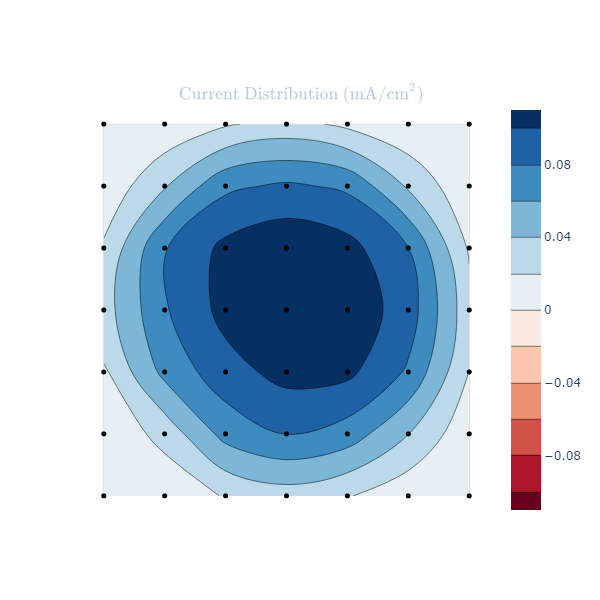

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
8  201201_114230    125  142.7  70.8  1.53      30.42  12.73   0.1316   

   pressure            note  
8    0.0015  Tube floating.

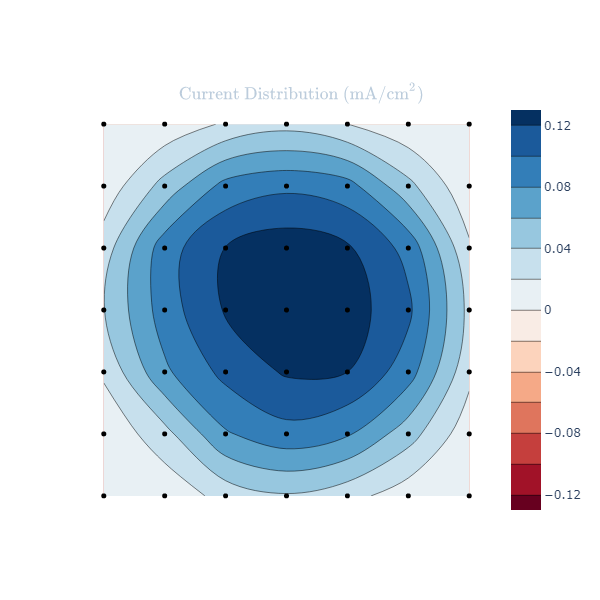

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
9  201201_114344    125  149.9  70.9  1.58      28.83  13.99   0.1453   

   pressure            note  
9    0.0023  Tube floating.

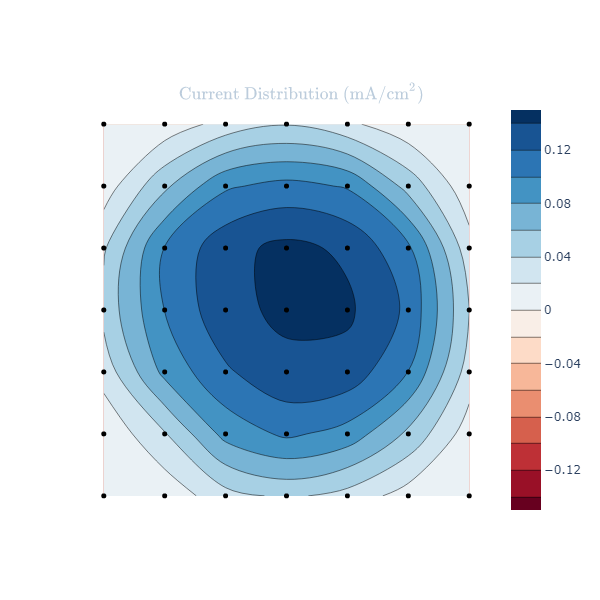

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
10  201201_114446    125  157.1  70.8  1.68      27.27  15.36   0.1592   

    pressure            note  
10    0.0034  Tube floating.

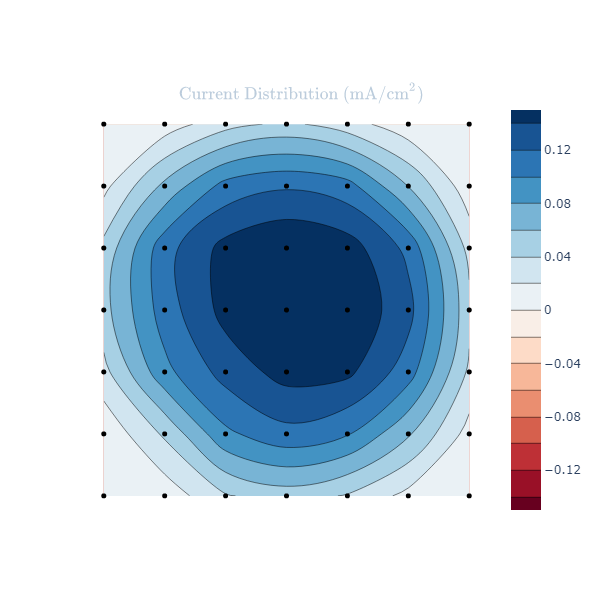

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase   IpinMax  \
11  201201_115133    125   19.2  70.7   1.6       70.1 -0.084  0.003722   

    pressure            note  
11    0.0001  Tube floating.

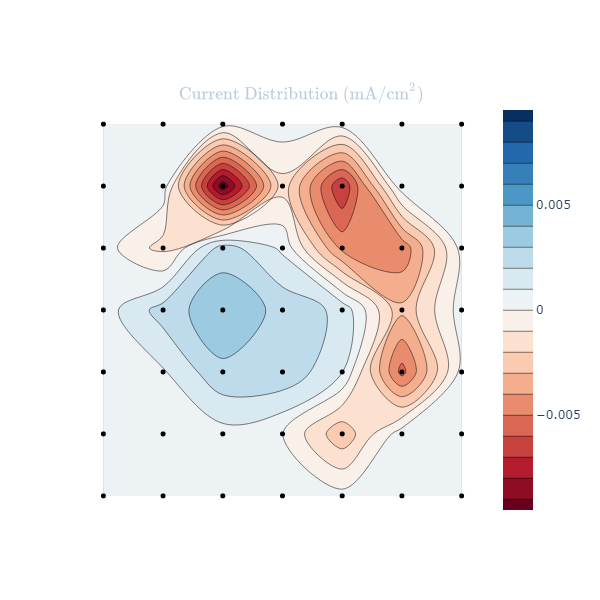

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
12  201201_115224    125   32.5  70.8  1.63       64.2   0.77  0.01359   

    pressure            note  
12   0.00012  Tube floating.

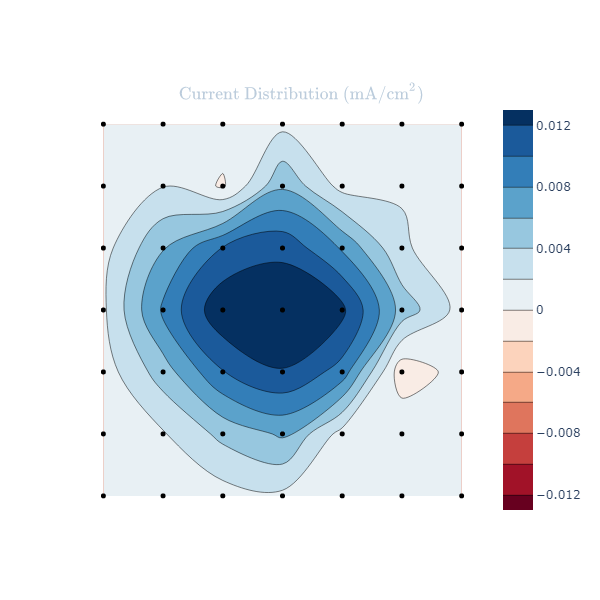

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
13  201201_115330    125   57.4  70.8  1.66       57.3  2.927  0.03581   

    pressure            note  
13   0.00015  Tube floating.

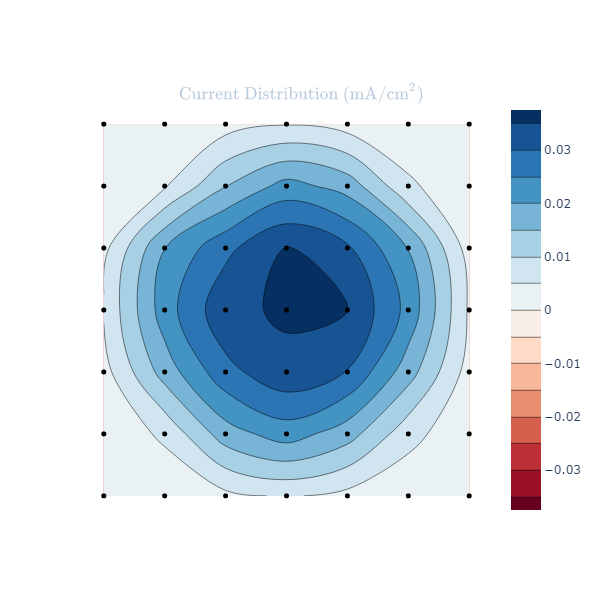

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
14  201201_115432    125   87.4  70.8  1.73      47.38   5.84  0.06662   

    pressure            note  
14   0.00023  Tube floating.

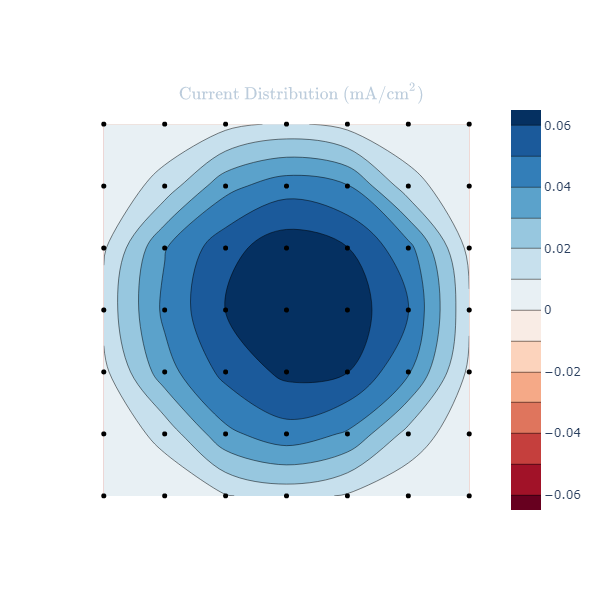

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
15  201201_115529    125  127.4  70.8  1.79      42.53   8.85  0.09802   

    pressure            note  
15   0.00036  Tube floating.

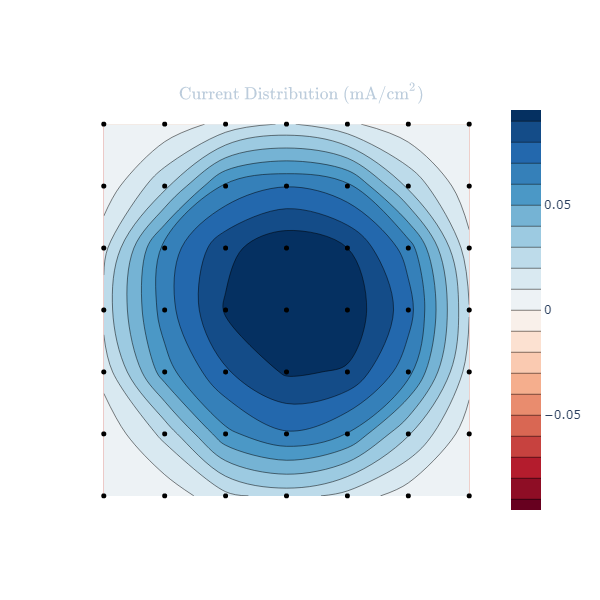

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
16  201201_115625    125  160.8  70.8  1.86      39.54  11.59    0.127   

    pressure            note  
16    0.0005  Tube floating.

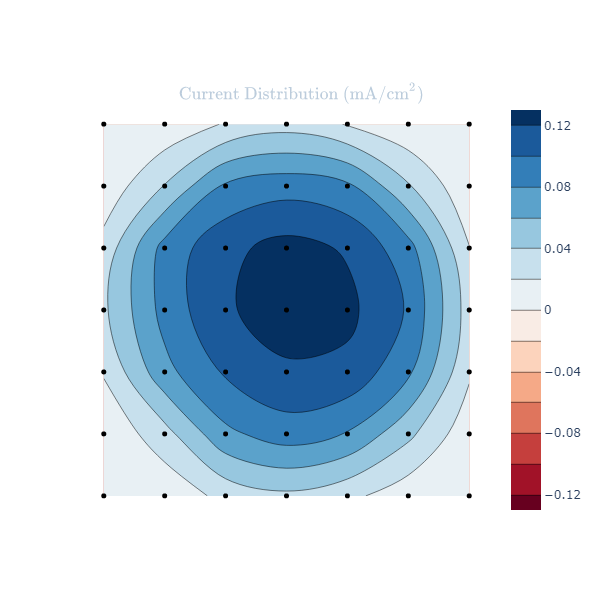

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
17  201201_115718    125  184.1  70.8  1.97      36.09   14.2   0.1539   

    pressure            note  
17   0.00075  Tube floating.

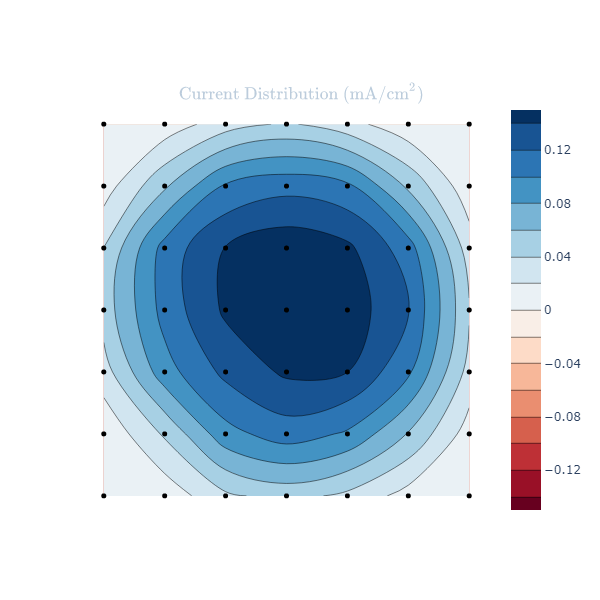

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
18  201201_115858    125  209.0  70.8  2.14      32.62  17.75   0.1852   

    pressure            note  
18    0.0012  Tube floating.

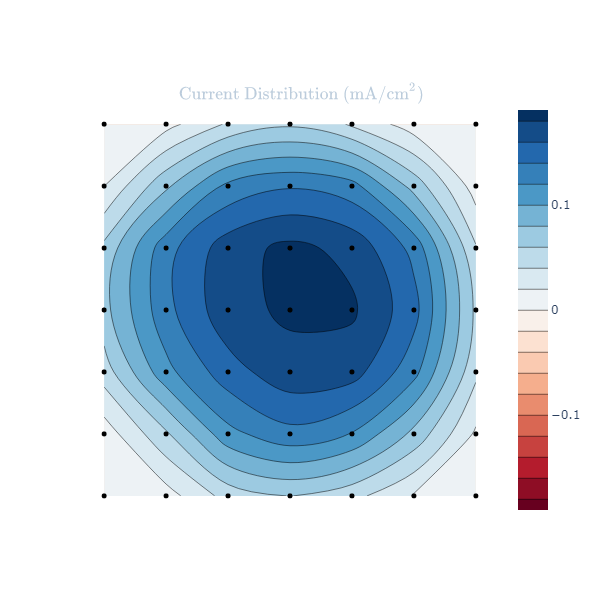

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
19  201201_120013    125  206.0  70.8  2.36      29.87  19.73   0.2036   

    pressure            note  
19     0.002  Tube floating.

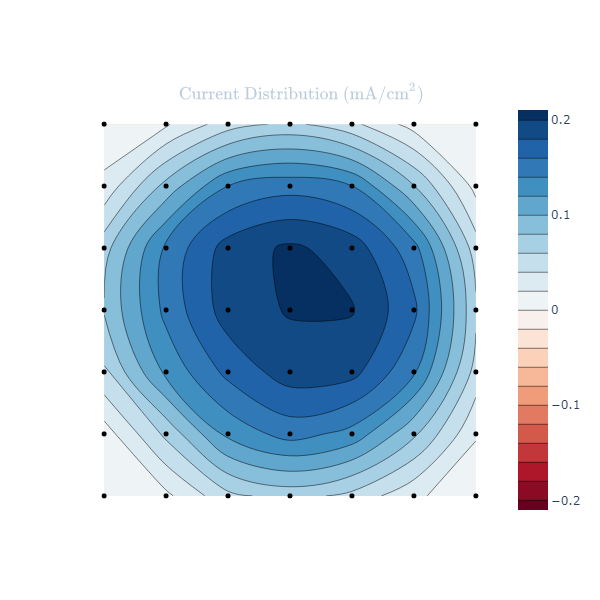

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
20  201201_120138    125  216.0  70.8  2.46       29.4  20.91   0.2161   

    pressure                                               note  
20    0.0024  Tube floating. Any higher pressure and get bre...

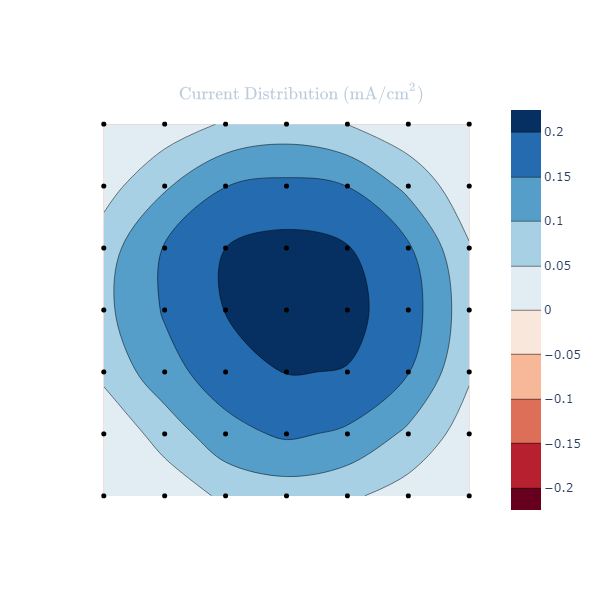

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase   IpinMax  \
21  201201_120336    125  0.004  70.8  2.72       84.8 -1.483  0.000125   

    pressure                                               note  
21  0.000085  Tube floating. Any higher pressure and get bre...

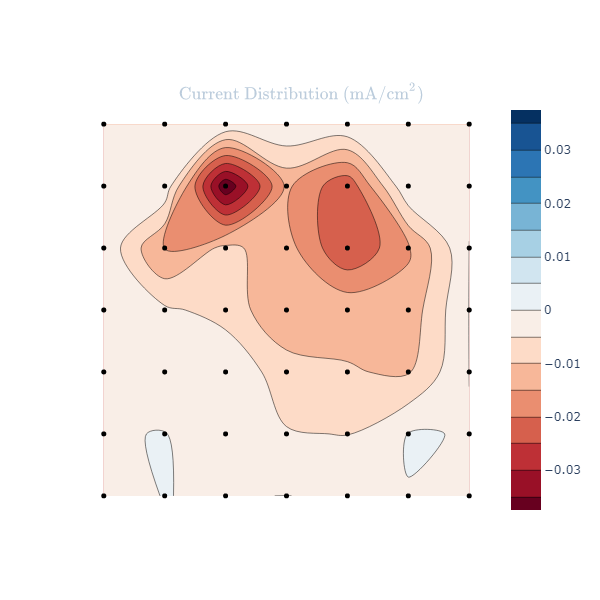

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
22  201201_120529    125  0.035  70.8  2.84       72.4 -0.383   0.0144   

    pressure                                               note  
22    0.0001  Tube floating. Any higher pressure and get bre...

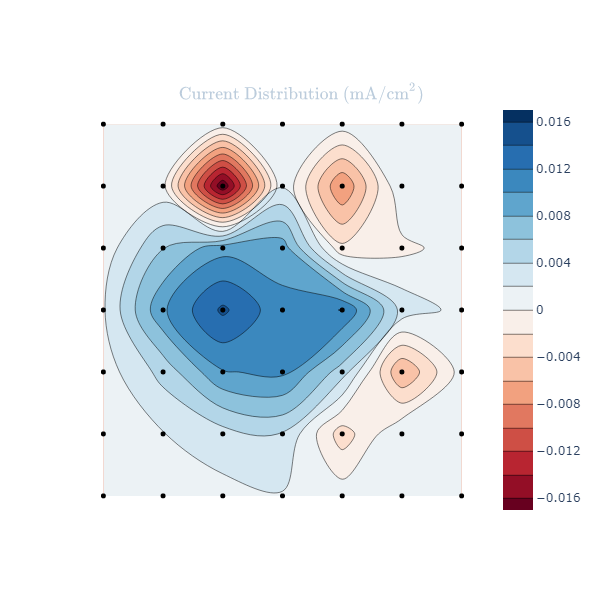

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
23  201201_120648    125  0.057  70.8  2.89       67.6   1.16  0.02814   

    pressure                                               note  
23   0.00011  Tube floating. Any higher pressure and get bre...

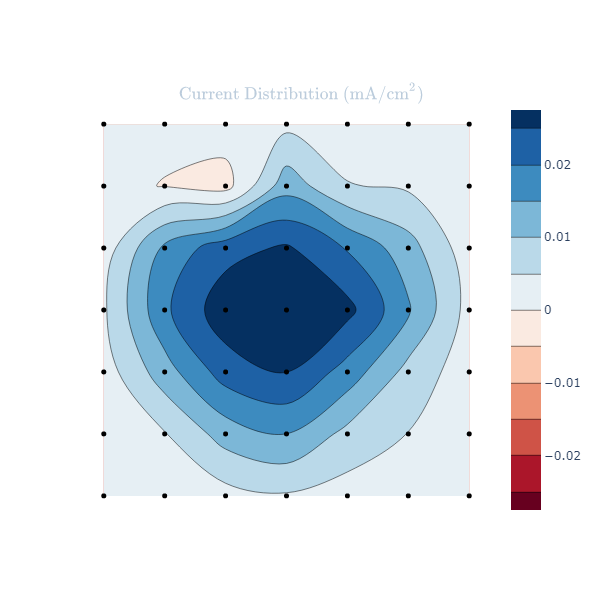

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
24  201201_120813    125  0.093  70.8  2.98       59.2    4.5  0.06298   

    pressure                                               note  
24   0.00015  Tube floating. Any higher pressure and get bre...

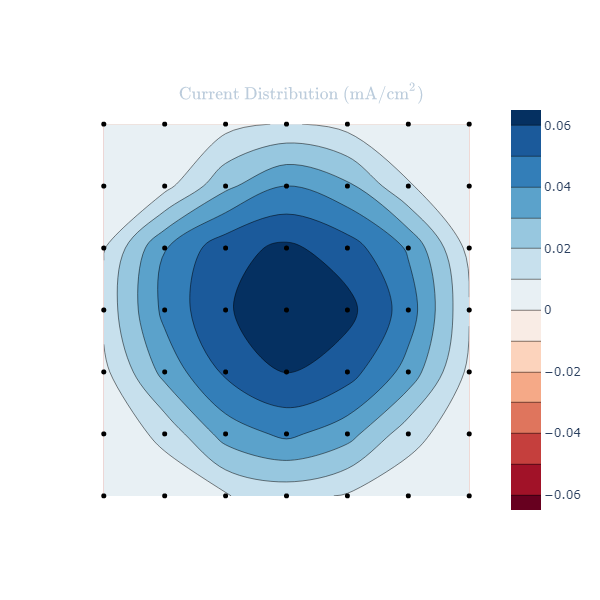

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
25  201201_121008    125  0.239  70.8  3.22      49.17  13.22   0.1698   

    pressure                                               note  
25   0.00027  Tube floating. Any higher pressure and get bre...

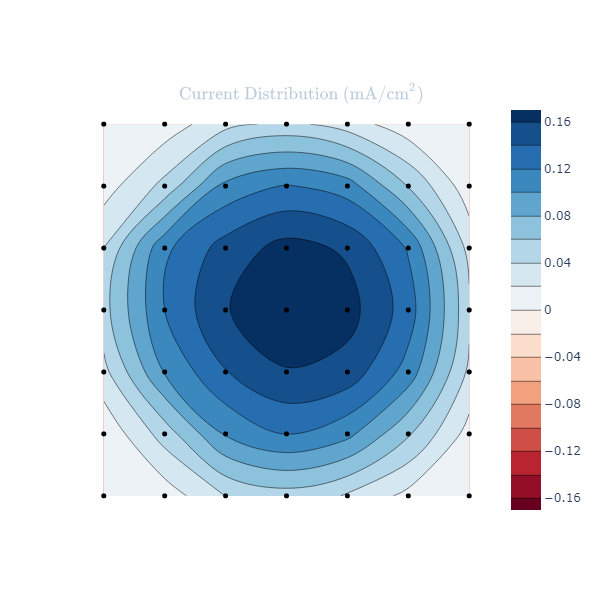

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
26  201201_121115    125  0.307  70.8  3.43       43.8  18.65   0.2294   

    pressure                                               note  
26   0.00042  Tube floating. Any higher pressure and get bre...

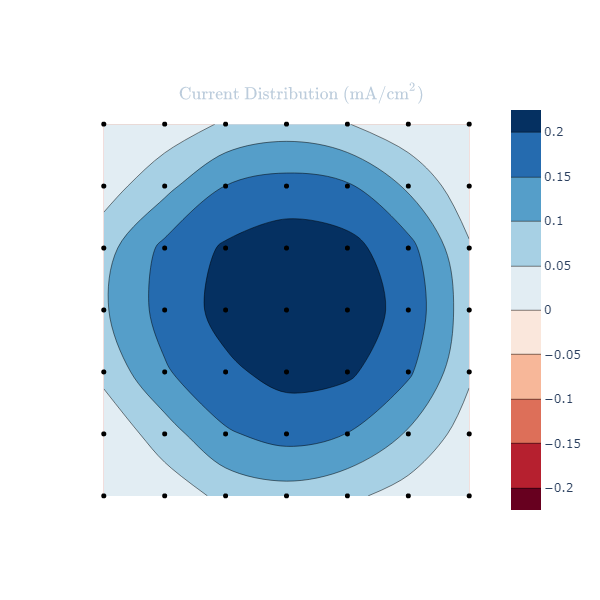

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
27  201201_121214    125  0.356  70.5  3.68       39.9  22.98   0.2769   

    pressure                                               note  
27   0.00055  Tube floating. Any higher pressure and get bre...

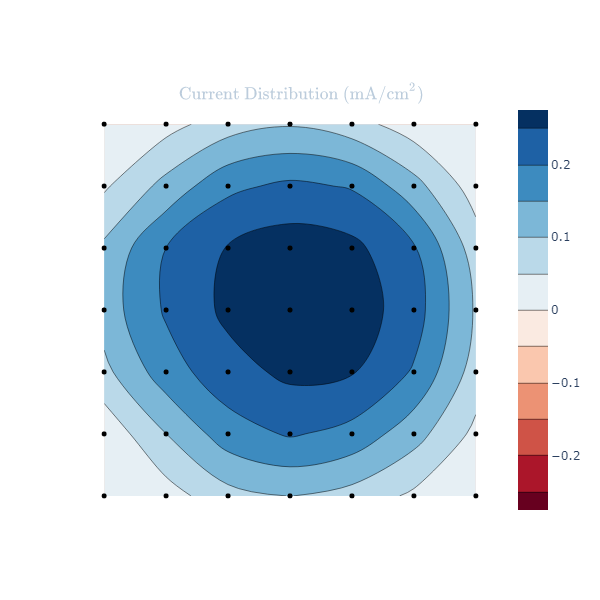

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase   IpinMax  \
28  201201_121624    125 -0.002  70.4  3.84      100.8 -2.435  0.000224   

    pressure                                               note  
28  0.000006  Tube floating. Any higher pressure and get bre...

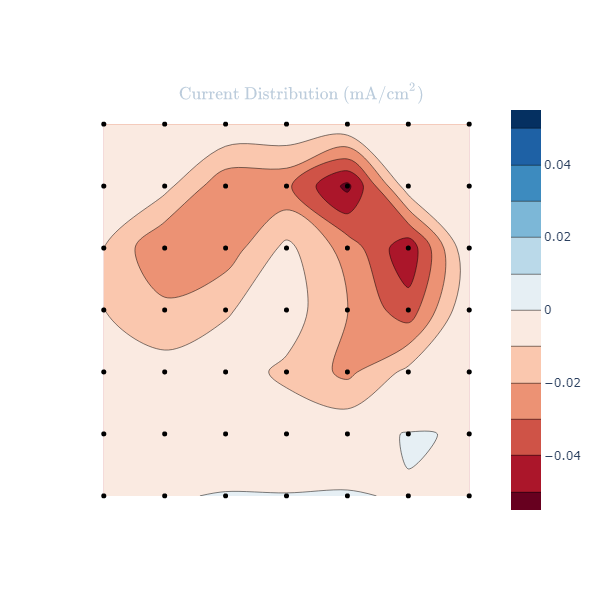

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase   IpinMax  \
29  201201_121716    125  0.002  70.4  4.08       89.4  -2.25  0.000151   

    pressure                                               note  
29  0.000008  Tube floating. Any higher pressure and get bre...

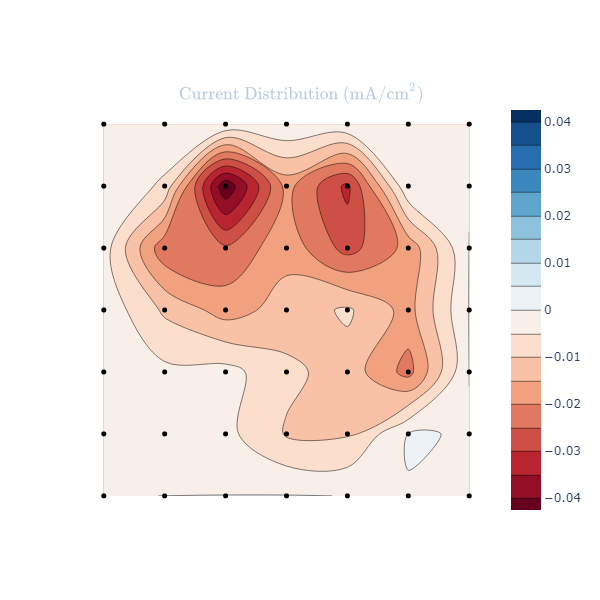

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
30  201201_121841    125  0.062  73.4  4.29       73.4  -0.44  0.02826   

    pressure                                               note  
30    0.0001  Tube floating. Any higher pressure and get bre...

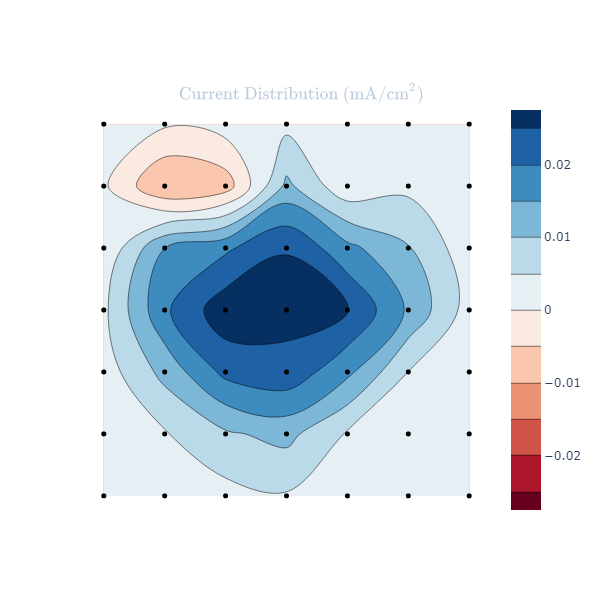

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
31  201201_121951    125  0.202  73.4  4.58       59.1   9.01   0.1271   

    pressure             note  
31   0.00016  Tube floating.

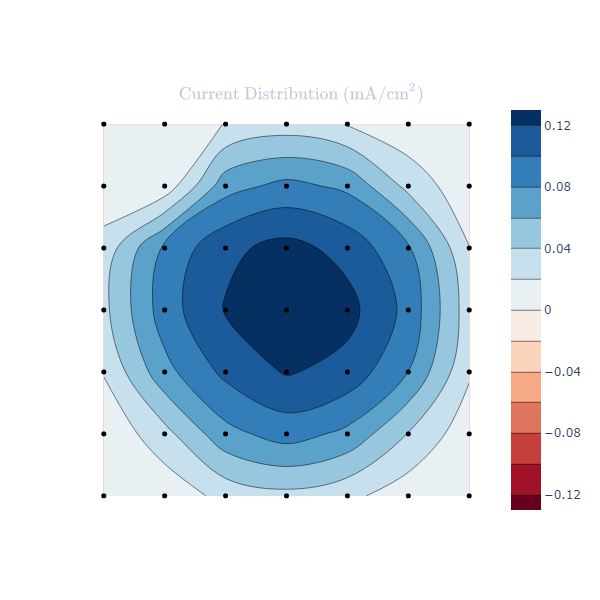

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
32  201201_122114    125  0.359  70.2   4.9      52.02  17.04   0.2497   

    pressure             note  
32   0.00023  Tube floating.

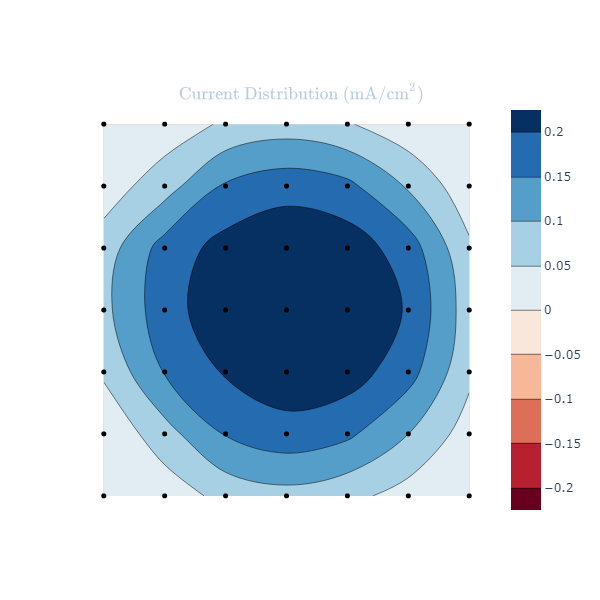

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
33  201201_122230    125  0.451  70.1  5.21      47.11   22.8   0.3253   

    pressure             note  
33   0.00034  Tube floating.

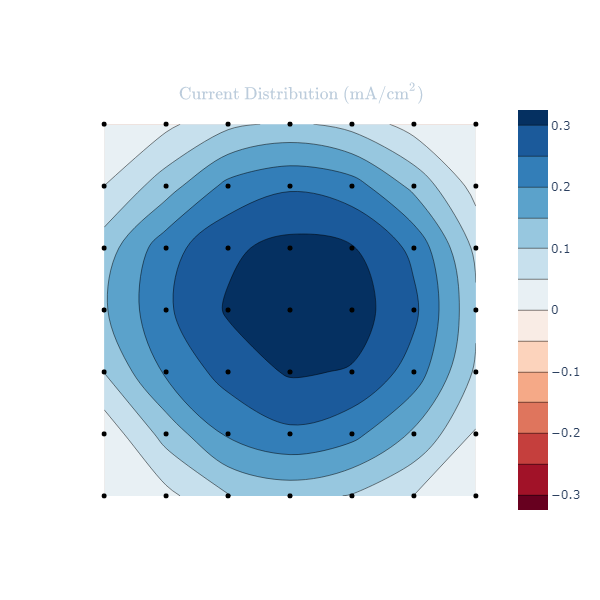

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
34  201201_122355    125  0.486  70.1  5.38      45.48  24.81   0.3574   

    pressure             note  
34    0.0004  Tube floating.

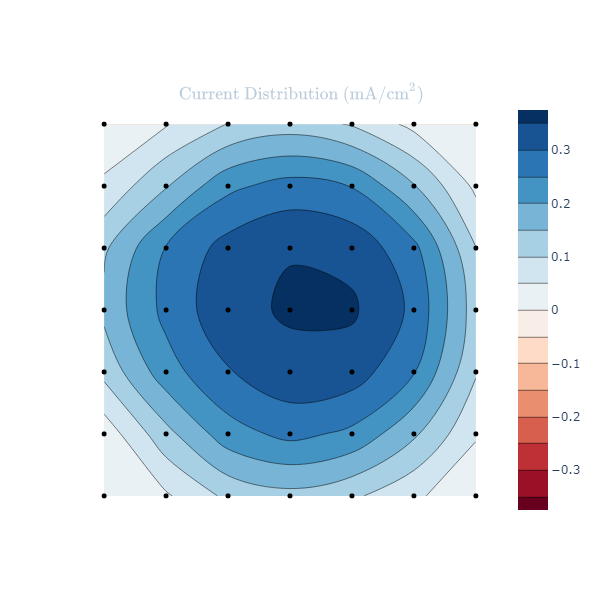

time  Vbias  Ibias  Varc  Iarc  Vpfs_tube  Ibase  IpinMax  \
35  201201_122708    125  0.548  70.1  6.08      45.64  26.55   0.4071   

    pressure                                               note  
35    0.0004  Tube floating. Now increasing current at max p...

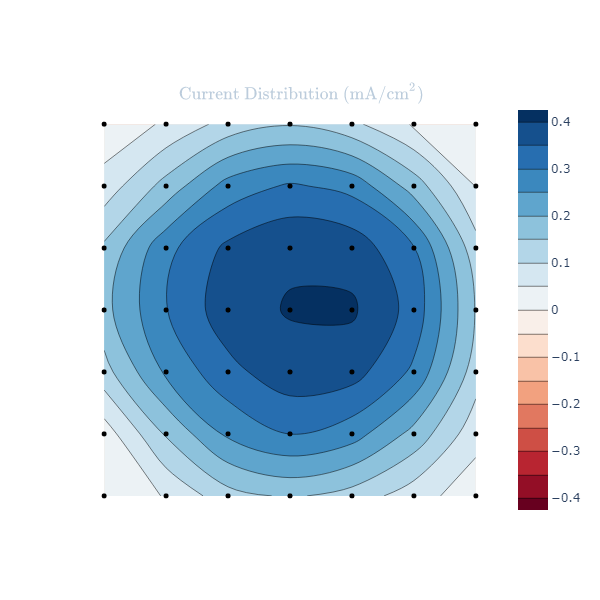

In [85]:
# conda install -c plotly plotly-orca
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from IPython.display import Image
df = pd.DataFrame(savedData.data)
# df = df[['time', 'Vbias', 'Ibias', 'Vext', 'Iext', 'Ve1', 'Ie1', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]

IpinMax = []
for currentArray in df.currents:
    IpinMax.append(np.max(currentArray))
    
df = df[['time', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Vpfs_tube','Ibase', 'pressure', 'note']]
df.insert(7, "IpinMax", IpinMax, True)

for i in range(savedData.len()):
    display(df[i:i+1])
    fig = savedData.plotI(i)
#     fig = plotI(data.data[i]['currents'])
    display(Image(pio.to_image(fig, format='png'))) # use this to have static graphs render on github.
#     fig.show()

##### Plot of $I_{base}$ and $I_{PinMax}$ vs Run

In [ ]:
x = []
Ibase = []
IpinMax = []
for i, run in enumerate(savedData.data):
    x.append(i)
    Ibase.append(run['Ibase'])
    currents = np.array(run['currents'])
    IpinMax.append(np.max(currents)) 
    print(run['time'], i, Ibase[i], IpinMax[i])

In [86]:
import plotly.express as px
import numpy as np
# df = px.data.iris()
fig = px.scatter(df, x='pressure', y='Ibase', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
                             'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })
fig.update_layout(height=600)
fig.show()

In [71]:
df

time  Vbias    Ibias  Varc  Iarc  Vpfs_tube   Ibase  pressure  \
0   201201_113416    125    0.003  70.8  1.10      90.80  -0.065  0.000055   
1   201201_113528    125    2.600  70.8  1.17      73.40  -0.176  0.000090   
2   201201_113636    125    8.600  70.8  1.22      67.00   0.064  0.000110   
3   201201_113727    125   23.700  70.8  1.24      58.70   1.013  0.000130   
4   201201_113821    125   65.600  70.8  1.22      52.57   4.340  0.000170   
5   201201_113931    125   81.600  70.8  1.28      42.68   6.100  0.000300   
6   201201_114034    125  114.700  70.8  1.36      35.96   9.100  0.000600   
7   201201_114128    125  131.700  70.8  1.44      33.13  11.050  0.000900   
8   201201_114230    125  142.700  70.8  1.53      30.42  12.730  0.001500   
9   201201_114344    125  149.900  70.9  1.58      28.83  13.990  0.002300   
10  201201_114446    125  157.100  70.8  1.68      27.27  15.360  0.003400   
11  201201_115133    125   19.200  70.7  1.60      70.10  -0.084  0.000100   
12  201201_115224    125   32.500  70.8  1.63      64.20   0.770  0.000120   
13  201201_115330    125   57.400  70.8  1.66      57.30   2.927  0.000150   
14  201201_115432    125   87.400  70.8  1.73      47.38   5.840  0.000230   
15  201201_115529    125  127.400  70.8  1.79      42.53   8.850  0.000360   
16  201201_115625    125  160.800  70.8  1.86      39.54  11.590  0.000500   
17  201201_115718    125  184.100  70.8  1.97      36.09  14.200  0.000750   
18  201201_115858    125  209.000  70.8  2.14      32.62  17.750  0.001200   
19  201201_120013    125  206.000  70.8  2.36      29.87  19.730  0.002000   
20  201201_120138    125  216.000  70.8  2.46      29.40  20.910  0.002400   
21  201201_120336    125    0.004  70.8  2.72      84.80  -1.483  0.000085   
22  201201_120529    125    0.035  70.8  2.84      72.40  -0.383  0.000100   
23  201201_120648    125    0.057  70.8  2.89      67.60   1.160  0.000110   
24  201201_120813    125    0.093  70.8  2.98      59.20   4.500  0.000150   
25  201201_121008    125    0.239  70.8  3.22      49.17  13.220  0.000270   
26  201201_121115    125    0.307  70.8  3.43      43.80  18.650  0.000420   
27  201201_121214    125    0.356  70.5  3.68      39.90  22.980  0.000550   
28  201201_121624    125   -0.002  70.4  3.84     100.80  -2.435  0.000006   
29  201201_121716    125    0.002  70.4  4.08      89.40  -2.250  0.000008   
30  201201_121841    125    0.062  73.4  4.29      73.40  -0.440  0.000100   
31  201201_121951    125    0.202  73.4  4.58      59.10   9.010  0.000160   
32  201201_122114    125    0.359  70.2  4.90      52.02  17.040  0.000230   
33  201201_122230    125    0.451  70.1  5.21      47.11  22.800  0.000340   
34  201201_122355    125    0.486  70.1  5.38      45.48  24.810  0.000400   
35  201201_122708    125    0.548  70.1  6.08      45.64  26.550  0.000400   

                                                 note  
0                                      Tube floating.  
1                                      Tube floating.  
2                                      Tube floating.  
3                                      Tube floating.  
4                                      Tube floating.  
5                                      Tube floating.  
6                                      Tube floating.  
7                                      Tube floating.  
8                                      Tube floating.  
9                                      Tube floating.  
10                                     Tube floating.  
11                                     Tube floating.  
12                                     Tube floating.  
13                                     Tube floating.  
14                                     Tube floating.  
15                                     Tube floating.  
16                                     Tube floating.  
17                                     Tube floating.  
18                                     Tube floating.  
19    